<a href="https://colab.research.google.com/github/eliasfrivas/Colab/blob/main/ProyectoDS_ParteIII_ERivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto Final CODER HOUSE 2025 -- COMISION: 67465 -- DATA SCIENCE I

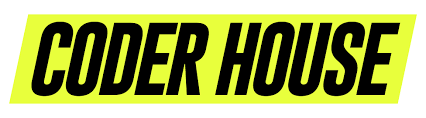


# En este proyecto de Machine Learning voy a utilizar la misma DataSet sobre el lanzamiento de Juegos desde 1980 a 2020

Objetivo: Construir un modelo de Machine Learning para predecir el valor de Ventas de Juegos para diferentes plataformas, basandose en nuestra base datos de los juegos que fueron lanzados desde 1980 y fueron vendidos en diferentes Regiones. Utilizaremos un RandomForestRegressor.

Dataset: Video_Games.csv

Pasos:

1.   **Introducción y Objetivo:** Definir el problema y el objetivo.
2.   **Importar Librerías:** Cargar las herramientas necesarias.
3.   **Carga de Datos:** Leer el dataset.
4.   **Hipótesis:** Plantear una hipótesis clara.
5.   **Análisis Exploratorio de Datos (EDA):** Entender los datos, distribuciones, valores faltantes y relaciones.
6.   **Feature Engineering (Ingeniería de Características):** (Opcional para este ejemplo básico, pero importante en la práctica).
7.   **Preprocesamiento de Datos:** Preparar los datos para el modelo (escalado de numéricas, manejo de categóricas si las hubiera).
8.   **División de Datos**: Separar en conjuntos de entrenamiento y prueba.
9.   **Construcción y Entrenamiento del Modelo:** Usar RandomForestRegressor.
10.   **Evaluación del Modelo:** Medir el rendimiento con métricas adecuadas para regresión (MAE, MSE, RMSE, R²).
11.   **Análisis de Importancia de Características:** Identificar qué variables son más influyentes.
12.   **Conclusiones:** Interpretar los resultados y validar/refutar la hipótesis.












## 1. Introducción y Objetivo

**Objetivo**: El objetivo es predecir el valor de Ventas Golbales (`Global_Sales`). Esta es una tarea de regresión, ya que la variable objetivo es continua.

## 2. Importar Librerías

In [210]:
#Importacion de las librerias para el Proyecto
import pandas as pd #manejo de dataset
import numpy as np #formulas
import seaborn as sns #graficos con seaborn
import matplotlib.pyplot as plt #graficos con matplot
from sklearn.model_selection import train_test_split #entrenar el modelo
from sklearn.preprocessing import OneHotEncoder, StandardScaler #preprocesador
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error #metricas
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer #columntransformer
from sklearn.pipeline import Pipeline #pipeline
from sklearn.impute import SimpleImputer #simpleimputer
from sklearn.ensemble import RandomForestRegressor


## 3. Carga de Datos

In [211]:
# Carga del Dataset
df=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT--Iw_aY43yv6z1hgffZlW8i9DswAVpYdAz3i2AY1j9AsDmr6uHF-dcNhEvrX-QhVqbcNhtW5I9V8y/pub?gid=1088532269&single=true&output=csv')
df.head()
print("Dataset cargado exitosamente. Primeras 5 filas:")
df.head()


Dataset cargado exitosamente. Primeras 5 filas:


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
print("\nInformación del Dataset:")
df.info()


Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory 

In [213]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


## 4. Hipótesis

#### **Hipótesis Nula (H0)**: Las características disponibles (Año de Lanzamiento, Criticas, Plataforma, etc.) no son suficientes para predecir el valor de Ventas Globales con un rendimiento significativamente mejor que un modelo base (ej. predecir siempre el valor medio). Esperaríamos un R² cercano a 0.

#### **Hipótesis Alternativa (H1)**: Es posible construir un modelo de regresión (Random Forest Regressor) utilizando las características disponibles que prediga el valor mediano de las Futuras Ventas con un coeficiente de determinación (R²) significativamente superior a 0 (idealmente > 0.5 o 0.6 para considerarlo útil) y un Error Absoluto Medio (MAE) razonablemente bajo.

# 5. Análisis Exploratorio de Datos (EDA)

## 5.1 Preparación y Analisis Inicial de Datos

In [214]:
# Convertir 'Year_of_Release' a tipo numérico y manejar errores
# Se puede usar .loc para evitar SettingWithCopyWarning
df.loc[:, 'Year_of_Release'] = pd.to_numeric(df['Year_of_Release'], errors='coerce')

In [215]:
# Convertir 'User_Score' a numérico. A menudo viene como 'tbd' (to be determined) o cadenas.
# Reemplazar 'tbd' con NaN antes de convertir a numérico.
df.loc[:, 'User_Score'] = df['User_Score'].replace('tbd', np.nan)
df.loc[:, 'User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

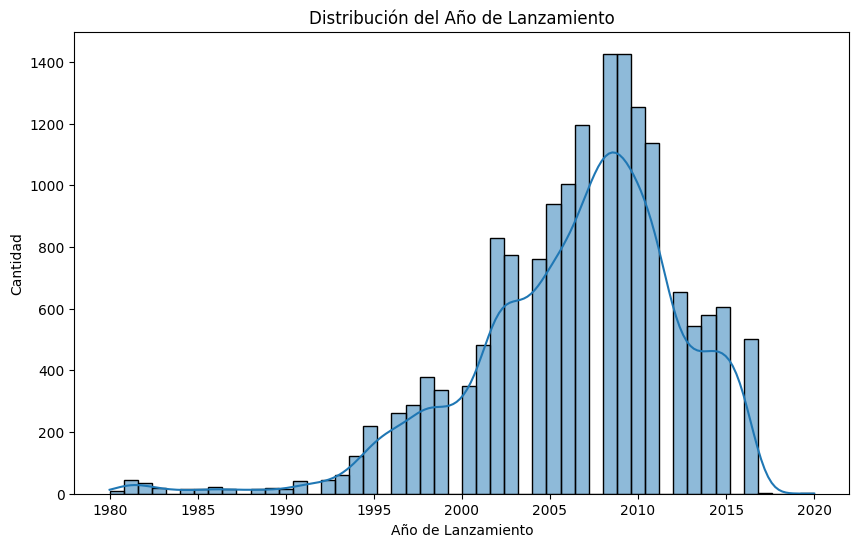

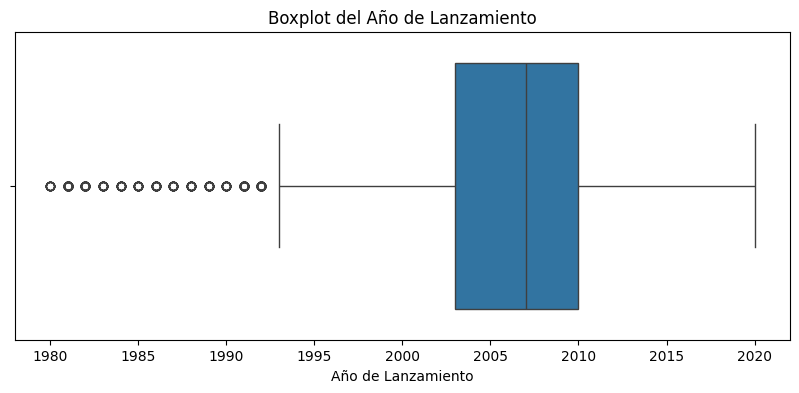

In [216]:
#Distribucion por Año de lanzamiento

plt.figure(figsize=(10, 6))

sns.histplot(df['Year_of_Release'], kde=True, bins=50)
plt.title('Distribución del Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Year_of_Release'])
plt.title('Boxplot del Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.show()

## 5.2. Análisis de variables numéricas (Características)

Características numéricas: ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']


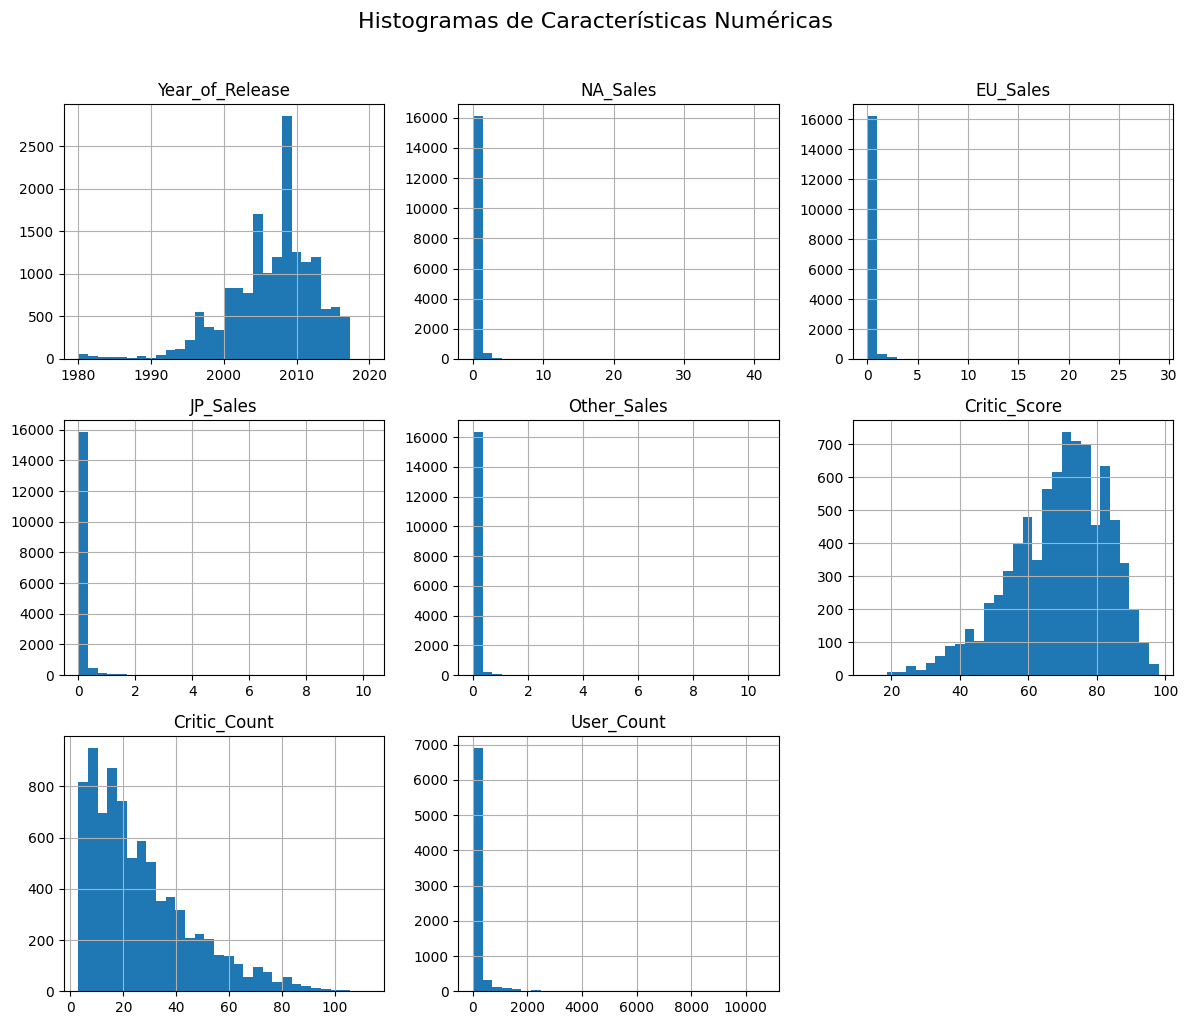

In [217]:
numerical_features = df.drop('Global_Sales', axis=1).columns.tolist()
print(f"Características numéricas: {numerical_features}")

# Histogramas para todas las características numéricas
df[numerical_features].hist(figsize=(12, 10), bins=30, layout=(3,3))
plt.suptitle('Histogramas de Características Numéricas', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

**Observación:** La variable objetivo `Global_Sales` se ve muy relacionada a las variables `Year_of_Release`, `Critic_Score` y `Critic_Count`

## 5.3 Preparacion de las Columnas Numericas y limpieza

In [218]:
# Seleccionar solo las columnas numéricas relevantes para la correlación.
# Incluimos las ventas individuales para ver su relación con Global_Sales, así como las puntuaciones y el año de lanzamiento.
# 'Critic_Count' y 'User_Count' también son numéricas y relevantes.
numeric_cols = [
    'Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales',
    'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count',
    'User_Score', 'User_Count'
]

# Creamos un DataFrame solo con estas columnas para el análisis de correlación
df_numeric = df[numeric_cols].copy()

# Rellenamos valores faltantes (NaN) en las columnas numéricas para la correlación
# Usaremos la media. Si hay muchos NaN, considera otras estrategias o la eliminación.

for col in df_numeric.columns:
    if df_numeric[col].isnull().any():
        df_numeric[col].fillna(df_numeric[col].mean(), inplace=True)

<ipython-input-218-1bbf3f67fab5>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_numeric[col].fillna(df_numeric[col].mean(), inplace=True)
<ipython-input-218-1bbf3f67fab5>:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_numeric[col].fillna(df_numeric[col].mean(), inplace=True)


## 5.4. Matriz de Correlación

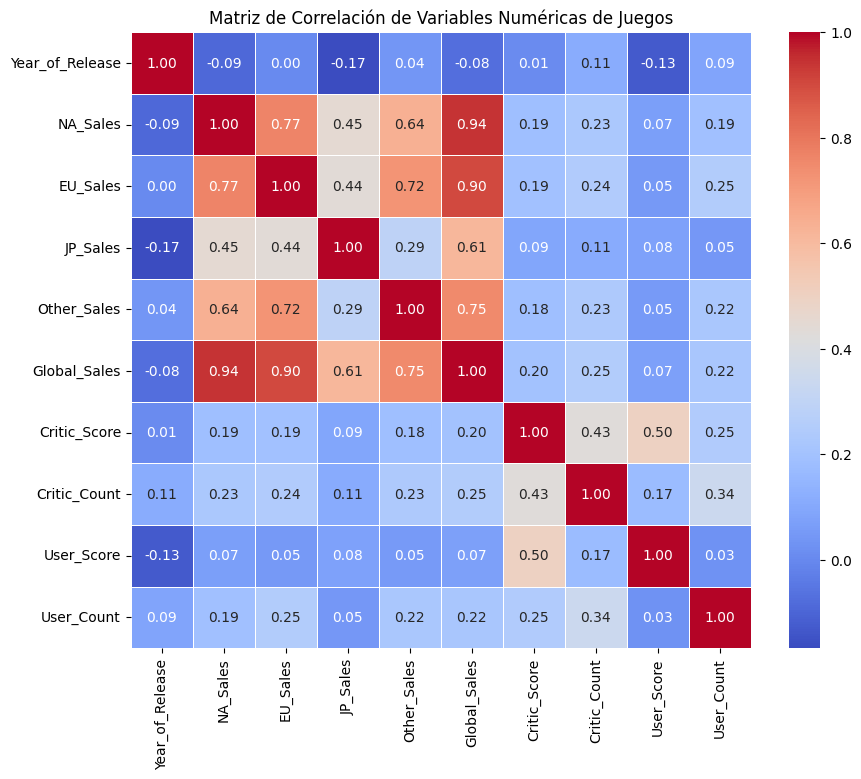


Correlación de cada variable con Global_Sales:
Global_Sales       1.000000
NA_Sales           0.941010
EU_Sales           0.901239
Other_Sales        0.749242
JP_Sales           0.612300
Critic_Count       0.248545
User_Count         0.216355
Critic_Score       0.200976
User_Score         0.071957
Year_of_Release   -0.076330
Name: Global_Sales, dtype: float64


In [219]:
# Calcular la Matriz de Correlación
# Se utiliza el método 'pearson' por defecto, que mide la correlación lineal.
correlation_matrix = df_numeric.corr()

#print("\nMatriz de Correlación:")
#print(correlation_matrix)

# Visualizar la Matriz de Correlación
plt.figure(figsize=(10, 8)) # Ajustar el tamaño para una mejor visualización
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas de Juegos')
plt.show()

# Análisis de Correlación con Global_Sales (Opcional) ---
print("\nCorrelación de cada variable con Global_Sales:")
print(correlation_matrix['Global_Sales'].sort_values(ascending=False))

**Observación:** `NA_Sales` (Ventas en Norteamerica) y `EU_Sales` tienen la correlación positiva más alta con `Global_Sales`. `Year_of_Release` tiene una correlación negativa moderada.

# 7. Preprocesamiento de Datos

In [220]:
# Definir las características (X) y la variable objetivo (y)
# Excluimos columnas que no son útiles como 'Name' (identificador) o ventas individuales si usamos Global_Sales.
# Rating a menudo es una descripción textual o una calificación, y podría necesitar más NLP.
# Para este ejemplo, incluimos 'Rating' si es categórica (ej. 'E', 'T', 'M')
# Si 'Rating' es numérico o una puntuación, inclúyela en numerical_features.
features = [
    'Year_of_Release', 'Platform', 'Genre', 'Developer',
    'Critic_Score', 'Critic_Count', 'NA_Sales', 'EU_Sales', 'JP_Sales',
    'Other_Sales', 'User_Score', 'User_Count'
]

target = 'Global_Sales' # La variable a predecir

In [221]:
# Crear una copia para evitar SettingWithCopyWarning
df_ml = df[features + [target]].copy()

In [222]:
# Eliminar filas donde la variable objetivo (Global_Sales) es NaN, ya que no podemos entrenar sin esto.
df_ml.dropna(subset=[target], inplace=True)

In [223]:
# Separar X e y
X = df_ml[features]
y = df_ml[target]

In [224]:
# Preprocesamiento de Columnas

# Identificar columnas numéricas y categóricas para el preprocesador
numerical_features = [
    'Year_of_Release', 'Critic_Score', 'Critic_Count','NA_Sales', 'EU_Sales', 'JP_Sales',
    'Other_Sales', 'User_Score', 'User_Count'
]
categorical_features = [
    'Platform', 'Genre','Developer'
]
#categorical_features = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']

In [225]:
# Pipelines para transformaciones:
# Numéricas: Imputar con la media y escalar (estandarizar)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [226]:
# Categóricas: Imputar con la moda y aplicar One-Hot Encoding
# handle_unknown='ignore' es crucial para manejar desarrolladores/publishers/géneros nuevos en el conjunto de prueba
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [227]:
# Combinar los preprocesadores usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 8. División de Datos (Train/Test Split)

In [228]:
# División del Dataset (Entrenamiento y Prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nDimensiones de los datos de entrenamiento: {X_train.shape}")
print(f"Dimensiones de los datos de prueba: {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento (y_train): {y_train.shape}")
print(f"Tamaño del conjunto de prueba (y_test): {y_test.shape}")


Dimensiones de los datos de entrenamiento: (13375, 12)
Dimensiones de los datos de prueba: (3344, 12)
Tamaño del conjunto de entrenamiento (y_train): (13375,)
Tamaño del conjunto de prueba (y_test): (3344,)


# 9. Construcción y Entrenamiento del Modelo (Random Forest Regressor)

In [229]:
# Construcción del Pipeline del Modelo
# Encadenamos el preprocesador y el modelo de regresión
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))])
                        # RandomForestRegressor es un excelente punto de partida.
                        # n_estimators: número de árboles, n_jobs=-1 usa todos los núcleos de la CPU.

In [230]:
# Entrenamiento del Modelo
print("\nEntrenando el modelo...")
model.fit(X_train, y_train)
print("Modelo entrenado exitosamente.")


Entrenando el modelo...
Modelo entrenado exitosamente.


# 10. Evaluación del Modelo

In [231]:
# Evaluación del Modelo
print("\nEvaluando el modelo...")
y_pred = model.predict(X_test)


Evaluando el modelo...


## 10.1. Métricas de Regresión

In [232]:
# Métricas de evaluación para regresión
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("--- Métricas de Evaluación del Modelo de Regresión ---")
print(f"\nError Absoluto Medio (MAE): {mae:.2f} (en millones de unidades de venta)")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

# Un R² cercano a 1 significa que el modelo explica una gran parte de la varianza en las ventas.
# Un MAE bajo indica que las predicciones están, en promedio, cerca de los valores reales.

print("\nInterpretación:")
print(f"- MAE: En promedio, las predicciones del modelo se desvían en {mae*1000000:,.1f} del valor de Ventas Globales")
print(f"- RMSE: Similar al MAE pero penaliza más los errores grandes. La desviación típica de los errores es de {rmse*1000000:,.1f}.")
print(f"- R²: El {r2*100:.2f}% de la varianza en el valor de las Ventas puede ser explicada por las características del modelo.")

--- Métricas de Evaluación del Modelo de Regresión ---

Error Absoluto Medio (MAE): 0.04 (en millones de unidades de venta)
Error Cuadrático Medio (MSE): 0.7710
Raíz del Error Cuadrático Medio (RMSE): 0.8781
Coeficiente de Determinación (R²): 0.81

Interpretación:
- MAE: En promedio, las predicciones del modelo se desvían en 43,100.5 del valor de Ventas Globales
- RMSE: Similar al MAE pero penaliza más los errores grandes. La desviación típica de los errores es de 878,056.9.
- R²: El 81.32% de la varianza en el valor de las Ventas puede ser explicada por las características del modelo.


In [233]:
# Ejemplo de Predicción de Ventas para un Futuro Juego
print("\n--- Ejemplo de Predicción para un Juego Hipotético Futuro ---")

# Crea un nuevo punto de datos con las mismas columnas que usaste para entrenar.
# ¡AJUSTA ESTOS VALORES para un juego hipotético que te gustaría predecir!
# Asegúrate de que las plataformas, géneros, desarrolladores, etc., sean realistas.
new_game_data = pd.DataFrame({
    'Year_of_Release': [2025], # Año futuro
    'Platform': ['PlayStation 5'],
    'Genre': ['Action'],
    'Publisher': ['Electronic Arts'],
    'Developer': ['EA Canada'],
    'Critic_Score': [15.0], # Puntuación esperada del crítico
    'Critic_Count': [20],    # Número de críticos que lo reseñaron
    'User_Score': [4.0],     # Puntuación esperada del usuario (sobre 10, si tu data es así)
    'User_Count': [5000],    # Número de usuarios que lo reseñaron
    'Rating': ['M'],          # Clasificación por edades (ej. Mature)
    'NA_Sales':[10.4],
    'EU_Sales':[11.4],
    'JP_Sales':[10.4],
    'Other_Sales':[20.4]
})

predicted_sales = model.predict(new_game_data)
print(f"\nLas Ventas Globales predichas para el juego hipotético son: {predicted_sales[0]:.2f} millones de unidades.")


--- Ejemplo de Predicción para un Juego Hipotético Futuro ---

Las Ventas Globales predichas para el juego hipotético son: 23.89 millones de unidades.


## 10.2. Gráfico de Predicciones vs Valores Reales

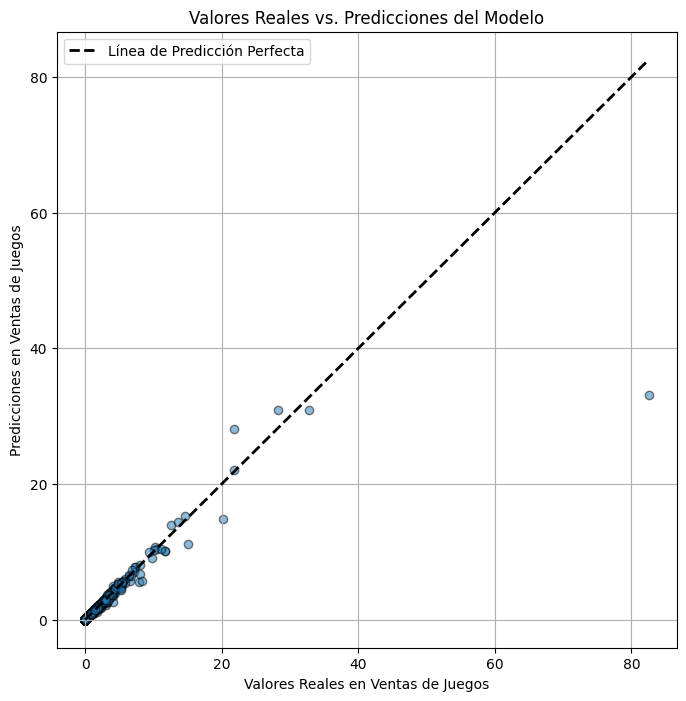

In [234]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Línea de Predicción Perfecta')
plt.xlabel('Valores Reales en Ventas de Juegos')
plt.ylabel('Predicciones en Ventas de Juegos')
plt.title('Valores Reales vs. Predicciones del Modelo')
plt.legend()
plt.grid(True)
plt.show()

# 12. Conclusiones

In [235]:
print("Resumen de Resultados del Modelo de Regresión:")
print(f"- Error Absoluto Medio (MAE): {mae:.4f} (aproximadamente {mae*1000000:,.0f})")
print(f"- Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f} (aproximadamente {rmse*1000000:,.0f})")
print(f"- Coeficiente de Determinación (R²): {r2:.4f}")

Resumen de Resultados del Modelo de Regresión:
- Error Absoluto Medio (MAE): 0.0431 (aproximadamente 43,101)
- Raíz del Error Cuadrático Medio (RMSE): 0.8781 (aproximadamente 878,057)
- Coeficiente de Determinación (R²): 0.8132


#CASO 2: Realizaremos un **Modelo de Clasificacion** para el mismo Dataset pero considerando que quiero predecir cual sera el **Genero** mas vendido en cada **Region**

In [236]:
# Rellenar los pocos NaN que queden en las columnas de ventas con 0, si los hubiera,
# ya que 0 ventas es más coherente que la media para juegos no vendidos.
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for col in sales_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0) # Asegurar que sean numéricas y rellenar NaN con 0

In [237]:
# Agregación de Datos: Preparar para predecir el género más vendido por región/año

# Vamos a preparar un dataset donde cada fila represente un año-región-género
# y contenga las ventas totales de ese género en esa región y año.

# Primero, definir las regiones de ventas
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
target_regions = ['NA_Sales', 'EU_Sales', 'JP_Sales'] # Seleccionamos las principales para el ejemplo

In [238]:
# Crear un DataFrame vacío para almacenar los géneros dominantes por región/año
dominant_genre_df = pd.DataFrame()

for year in sorted(df['Year_of_Release'].unique()):
    for region_col in target_regions:
        # Filtrar datos para el año actual
        df_year = df[df['Year_of_Release'] == year]

        # Agrupar por Género y sumar las ventas de la región
        genre_sales = df_year.groupby('Genre')[region_col].sum()

        if not genre_sales.empty:
            # Encontrar el género con las ventas máximas en esa región y año
            top_genre = genre_sales.idxmax()
            max_sales = genre_sales.max()

            # Añadir esta información al DataFrame de géneros dominantes
            dominant_genre_df = pd.concat([dominant_genre_df, pd.DataFrame([{
                'Year': year,
                'Region': region_col,
                'Top_Genre': top_genre,
                'Sales_of_Top_Genre': max_sales
            }])], ignore_index=True)

print("\nGéneros dominantes por Año y Región (primeras filas):")
print(dominant_genre_df.head())
print(f"\nNúmero total de entradas de género dominante: {len(dominant_genre_df)}")


Géneros dominantes por Año y Región (primeras filas):
     Year    Region Top_Genre  Sales_of_Top_Genre
0  1980.0  NA_Sales   Shooter                6.56
1  1980.0  EU_Sales   Shooter                0.43
2  1980.0  JP_Sales    Action                0.00
3  1981.0  NA_Sales    Action               13.86
4  1981.0  EU_Sales    Action                0.81

Número total de entradas de género dominante: 117


In [239]:
# Preparación de Datos para el Modelo de Clasificación

# La variable objetivo será 'Top_Genre'
# Las características serán 'Year' y 'Region'
features_genre = ['Year', 'Region']
target_genre = 'Top_Genre'

In [240]:
# Separar X e y para el modelo de género dominante
X_genre = dominant_genre_df[features_genre]
y_genre = dominant_genre_df[target_genre]

# **FIX:** Filtro por cuenta de Top Genero mayor a 2
genre_counts = y_genre.value_counts()
genres_to_keep = genre_counts[genre_counts >= 2].index

In [241]:
genre_counts

,count
Top_Genre,
Action,36
Role-Playing,29
Platform,21
Shooter,8
Sports,8
Puzzle,5
Fighting,3
Racing,3
Simulation,3


In [242]:
# Filtro X_genre y y_genre para mantener las filas donde el Top_Genre esta en la lista de Genres a mantener
filtered_indices = y_genre[y_genre.isin(genres_to_keep)].index
X_genre_filtered = X_genre.loc[filtered_indices]
y_genre_filtered = y_genre.loc[filtered_indices]

print(f"\nNúmero total de entradas de género dominante después de filtrar clases con < 2 miembros: {len(y_genre_filtered)}")


Número total de entradas de género dominante después de filtrar clases con < 2 miembros: 116


In [243]:
# Preprocesamiento para las características del modelo de género
# 'Year' es numérica, 'Region' es categórica
numerical_features_genre = ['Year']
categorical_features_genre = ['Region']

In [244]:
# Pipeline de preprocesamiento
preprocessor_genre = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_genre), # Escalar el año
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_genre)
    ])

In [245]:
# División de datos para el modelo de género usando los datos filtrados
X_train_genre, X_test_genre, y_train_genre, y_test_genre = train_test_split(
    X_genre_filtered, y_genre_filtered, test_size=0.2, random_state=42, stratify=y_genre_filtered # Stratify con los datos filtrados
)

print(f"\nDimensiones de los datos de entrenamiento (género): {X_train_genre.shape}")
print(f"Dimensiones de los datos de prueba (género): {X_test_genre.shape}")


Dimensiones de los datos de entrenamiento (género): (92, 2)
Dimensiones de los datos de prueba (género): (24, 2)


In [246]:
# Construcción y Entrenamiento del Modelo de Clasificación
# Usamos RandomForestClassifier para la clasificación multi-clase
from sklearn.ensemble import RandomForestClassifier # Importar RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report # Importar métricas de clasificación

model_genre = Pipeline(steps=[('preprocessor', preprocessor_genre),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))])

print("\nEntrenando el modelo para predecir el género más vendido...")
model_genre.fit(X_train_genre, y_train_genre)
print("Modelo de género entrenado exitosamente.")


Entrenando el modelo para predecir el género más vendido...
Modelo de género entrenado exitosamente.


In [247]:
# Evaluación del Modelo de Clasificación
print("\nEvaluando el modelo de género...")
y_pred_genre = model_genre.predict(X_test_genre)


Evaluando el modelo de género...


In [248]:
accuracy = accuracy_score(y_test_genre, y_pred_genre)
print(f"\nPrecisión (Accuracy) del modelo de género: {accuracy:.2f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test_genre, y_pred_genre, zero_division=0))

# Ejemplo de Predicción: Género más vendido para un año futuro
print("\n--- Ejemplo de Predicción para el Género Más Vendido ---")

# Predicciones para un año y regiones futuras
# Ejemplo: predecir el género más vendido en NA y EU para 2025
future_predictions = pd.DataFrame({
    'Year': [2025, 2025, 2025],
    'Region': ['NA_Sales', 'EU_Sales', 'JP_Sales']
})

# Ensure the columns match the training data columns order
future_predictions = future_predictions[features_genre]

predicted_genres = model_genre.predict(future_predictions)

for i, row in future_predictions.iterrows():
    print(f"Para el año {int(row['Year'])} en la región {row['Region']}, el género más vendido predicho es: {predicted_genres[i]}")


Precisión (Accuracy) del modelo de género: 0.46

Reporte de Clasificación:
              precision    recall  f1-score   support

      Action       0.40      0.29      0.33         7
    Fighting       0.00      0.00      0.00         0
    Platform       0.40      0.50      0.44         4
      Puzzle       0.00      0.00      0.00         1
      Racing       0.00      0.00      0.00         1
Role-Playing       0.62      0.83      0.71         6
     Shooter       1.00      0.50      0.67         2
  Simulation       0.00      0.00      0.00         1
      Sports       0.33      0.50      0.40         2

    accuracy                           0.46        24
   macro avg       0.31      0.29      0.28        24
weighted avg       0.45      0.46      0.44        24


--- Ejemplo de Predicción para el Género Más Vendido ---
Para el año 2025 en la región NA_Sales, el género más vendido predicho es: Action
Para el año 2025 en la región EU_Sales, el género más vendido predicho es: Simu